In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf


In [138]:
data = pd.read_csv('/Users/leonardominski/Documents/Projetos Python/Pesquisa/data/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [140]:
x = data.drop(['Sales', 'Newspaper'], axis=1)
y = data['Sales']
data.shape

(200, 4)

In [141]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = keras.Sequential([keras.layers.Dense(units=20, activation ='linear', input_shape=[2,]),
                         keras.layers.Dense(units=10, activation='linear'),
                         keras.layers.Dense(units=1, activation='linear')])

In [142]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                60        
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [144]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
5/5 - 0s - loss: 162.7415 - mse: 162.7415 - val_loss: 15.6277 - val_mse: 15.6277 - 299ms/epoch - 60ms/step
Epoch 2/20
5/5 - 0s - loss: 46.4333 - mse: 46.4333 - val_loss: 84.6636 - val_mse: 84.6636 - 15ms/epoch - 3ms/step
Epoch 3/20
5/5 - 0s - loss: 57.6869 - mse: 57.6869 - val_loss: 24.1413 - val_mse: 24.1413 - 13ms/epoch - 3ms/step
Epoch 4/20
5/5 - 0s - loss: 14.8113 - mse: 14.8113 - val_loss: 14.7606 - val_mse: 14.7606 - 13ms/epoch - 3ms/step
Epoch 5/20
5/5 - 0s - loss: 26.6611 - mse: 26.6611 - val_loss: 14.8005 - val_mse: 14.8005 - 15ms/epoch - 3ms/step
Epoch 6/20
5/5 - 0s - loss: 14.3977 - mse: 14.3977 - val_loss: 8.1736 - val_mse: 8.1736 - 13ms/epoch - 3ms/step
Epoch 7/20
5/5 - 0s - loss: 11.2043 - mse: 11.2043 - val_loss: 14.4324 - val_mse: 14.4324 - 15ms/epoch - 3ms/step
Epoch 8/20
5/5 - 0s - loss: 11.4801 - mse: 11.4801 - val_loss: 7.2810 - val_mse: 7.2810 - 14ms/epoch - 3ms/step
Epoch 9/20
5/5 - 0s - loss: 8.4360 - mse: 8.4360 - val_loss: 6.1877 - val_mse: 6.1877 - 

In [148]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 1ms/step


In [149]:
print(y_pred[:5])
print(y_test[:5])

[[16.934645 ]
 [21.968899 ]
 [25.28924  ]
 [ 7.4141874]
 [23.91303  ]]
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


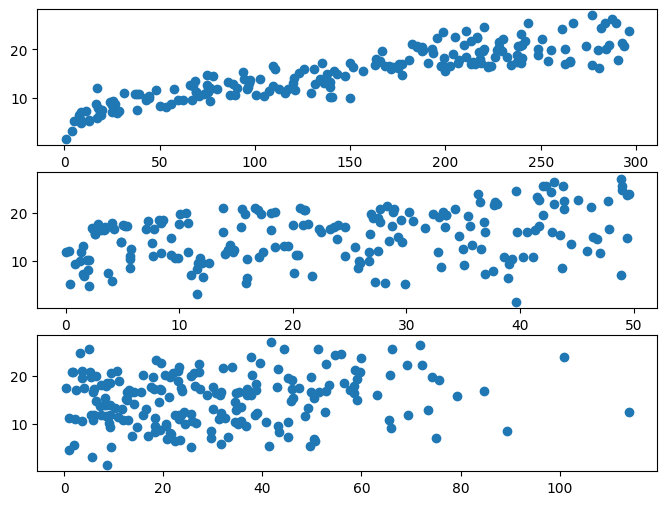

In [147]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,6))

axs[0].scatter(x=data['TV'], y=data['Sales'])
axs[1].scatter(x=data['Radio'], y=data['Sales'])
axs[2].scatter(x=data['Newspaper'], y=data['Sales'])

In [166]:
print(model.predict([[30,40]]))

1/1 [==============================] - 0s 18ms/step
[[9.218862]]
